# 3D Neural Visualization Tutorial

This comprehensive tutorial demonstrates advanced 3D visualization techniques in BrainTools for neural data analysis. We'll explore sophisticated methods for visualizing neural network architectures, brain surfaces, connectivity patterns, and dynamic neural trajectories in three-dimensional space.

## Learning Objectives

By the end of this tutorial, you will be able to:
- Visualize neural network architectures in 3D with customizable layers and connections
- Create brain surface visualizations with activation overlays
- Display 3D connectivity patterns between brain regions
- Track neural trajectories through 3D state space
- Apply volume rendering techniques to 3D neural data
- Visualize electrode arrays and recording sites in 3D
- Render dendritic tree structures
- Perform phase space analysis in 3D

## Prerequisites

- Basic understanding of neural data structures
- Familiarity with matplotlib and numpy
- BrainTools installed with visualization modules

In [1]:
import matplotlib.pyplot as plt
# Import required libraries
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.spatial import Delaunay

# Import braintools 3D visualization functions
from braintools.visualize.three_d import (
    neural_network_3d,
    brain_surface_3d,
    connectivity_3d,
    trajectory_3d,
    volume_rendering,
    electrode_array_3d,
    dendrite_tree_3d,
    phase_space_3d
)

# Set random seed for reproducibility
np.random.seed(42)

# Enable interactive plotting in Jupyter
%matplotlib inline

print("BrainTools 3D Visualization Tutorial")
print("=====================================")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")

BrainTools 3D Visualization Tutorial
NumPy version: 2.2.6
Matplotlib version: 3.10.6


## 1. 3D Neural Network Architecture Visualization

Visualizing neural network architectures in 3D provides intuitive understanding of network structure, layer connections, and activation patterns. This is particularly useful for deep learning models and biological neural networks.

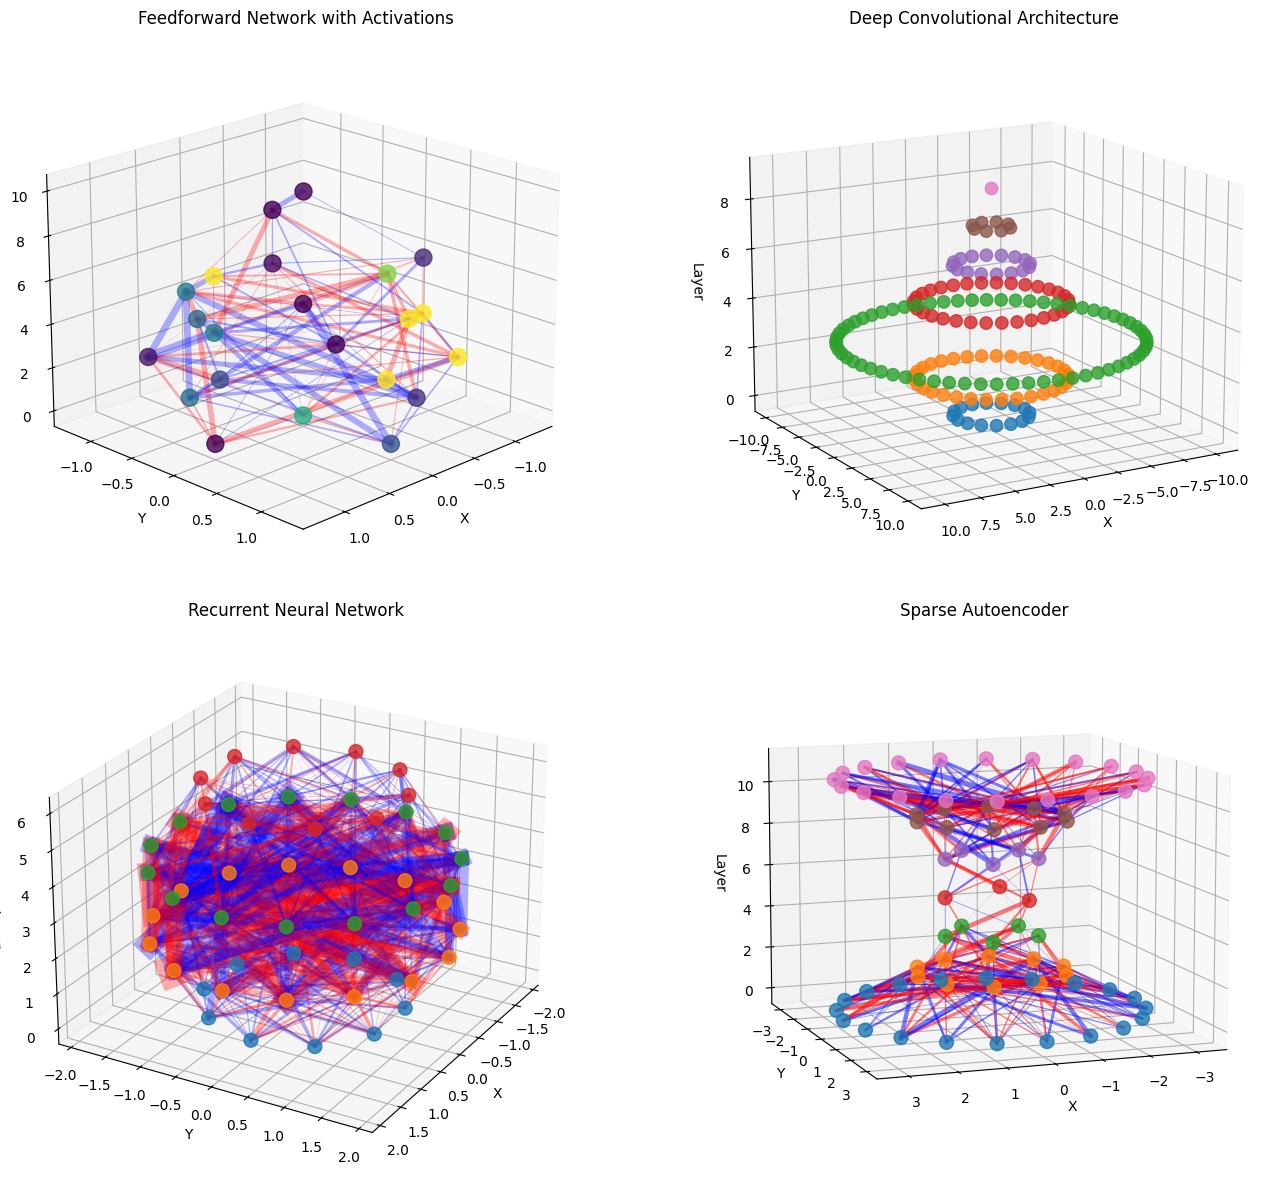


Neural Network 3D Visualization Features:
- Layer sizes define network architecture
- Connection weights shown as lines (red: positive, blue: negative)
- Line thickness represents connection strength
- Node colors can represent activation values
- Customizable spacing and layout parameters


In [2]:
# Example 1: Simple feedforward network
fig = plt.figure(figsize=(15, 12))

# Define network architecture
layer_sizes = [4, 8, 6, 3, 1]

# Generate random weights for connections
weights = []
for i in range(len(layer_sizes) - 1):
    w = np.random.randn(layer_sizes[i], layer_sizes[i + 1]) * 0.5
    weights.append(w)

# Generate random activations for neurons
activations = [np.random.rand(size) for size in layer_sizes]

# Create subplots for different views
ax1 = fig.add_subplot(221, projection='3d')
neural_network_3d(layer_sizes, weights=weights, activations=activations,
                  ax=ax1, title="Feedforward Network with Activations",
                  layer_spacing=2.5, node_size=150)

# Rotate view
ax1.view_init(elev=20, azim=45)

# Example 2: Convolutional network layers
ax2 = fig.add_subplot(222, projection='3d')
conv_layers = [16, 32, 64, 32, 16, 8, 1]
neural_network_3d(conv_layers, ax=ax2,
                  title="Deep Convolutional Architecture",
                  layer_spacing=1.5, node_size=80, edge_alpha=0.2)
ax2.view_init(elev=15, azim=60)

# Example 3: Recurrent network with strong recurrent connections
ax3 = fig.add_subplot(223, projection='3d')
rnn_layers = [10, 15, 15, 10]
# Create weights with emphasis on middle layers (recurrent)
rnn_weights = []
for i in range(len(rnn_layers) - 1):
    if i == 1:  # Strong recurrent connections in middle layer
        w = np.random.randn(rnn_layers[i], rnn_layers[i + 1]) * 1.5
    else:
        w = np.random.randn(rnn_layers[i], rnn_layers[i + 1]) * 0.3
    rnn_weights.append(w)

neural_network_3d(rnn_layers, weights=rnn_weights, ax=ax3,
                  title="Recurrent Neural Network",
                  layer_spacing=2.0, neuron_spacing=0.8)
ax3.view_init(elev=25, azim=30)

# Example 4: Sparse autoencoder
ax4 = fig.add_subplot(224, projection='3d')
autoencoder_layers = [20, 10, 5, 3, 5, 10, 20]
# Create sparse weights
sparse_weights = []
for i in range(len(autoencoder_layers) - 1):
    w = np.random.randn(autoencoder_layers[i], autoencoder_layers[i + 1]) * 0.3
    # Make weights sparse
    mask = np.random.random(w.shape) > 0.7
    w[mask] = 0
    sparse_weights.append(w)

neural_network_3d(autoencoder_layers, weights=sparse_weights, ax=ax4,
                  title="Sparse Autoencoder",
                  layer_spacing=1.8, edge_alpha=0.5)
ax4.view_init(elev=10, azim=70)

plt.tight_layout()
plt.show()

print("\nNeural Network 3D Visualization Features:")
print("- Layer sizes define network architecture")
print("- Connection weights shown as lines (red: positive, blue: negative)")
print("- Line thickness represents connection strength")
print("- Node colors can represent activation values")
print("- Customizable spacing and layout parameters")

## 2. Brain Surface Visualization with Activation Overlays

Brain surface visualizations allow us to map neural activity, functional regions, or experimental results onto anatomical structures. This is essential for understanding spatial organization of brain function.

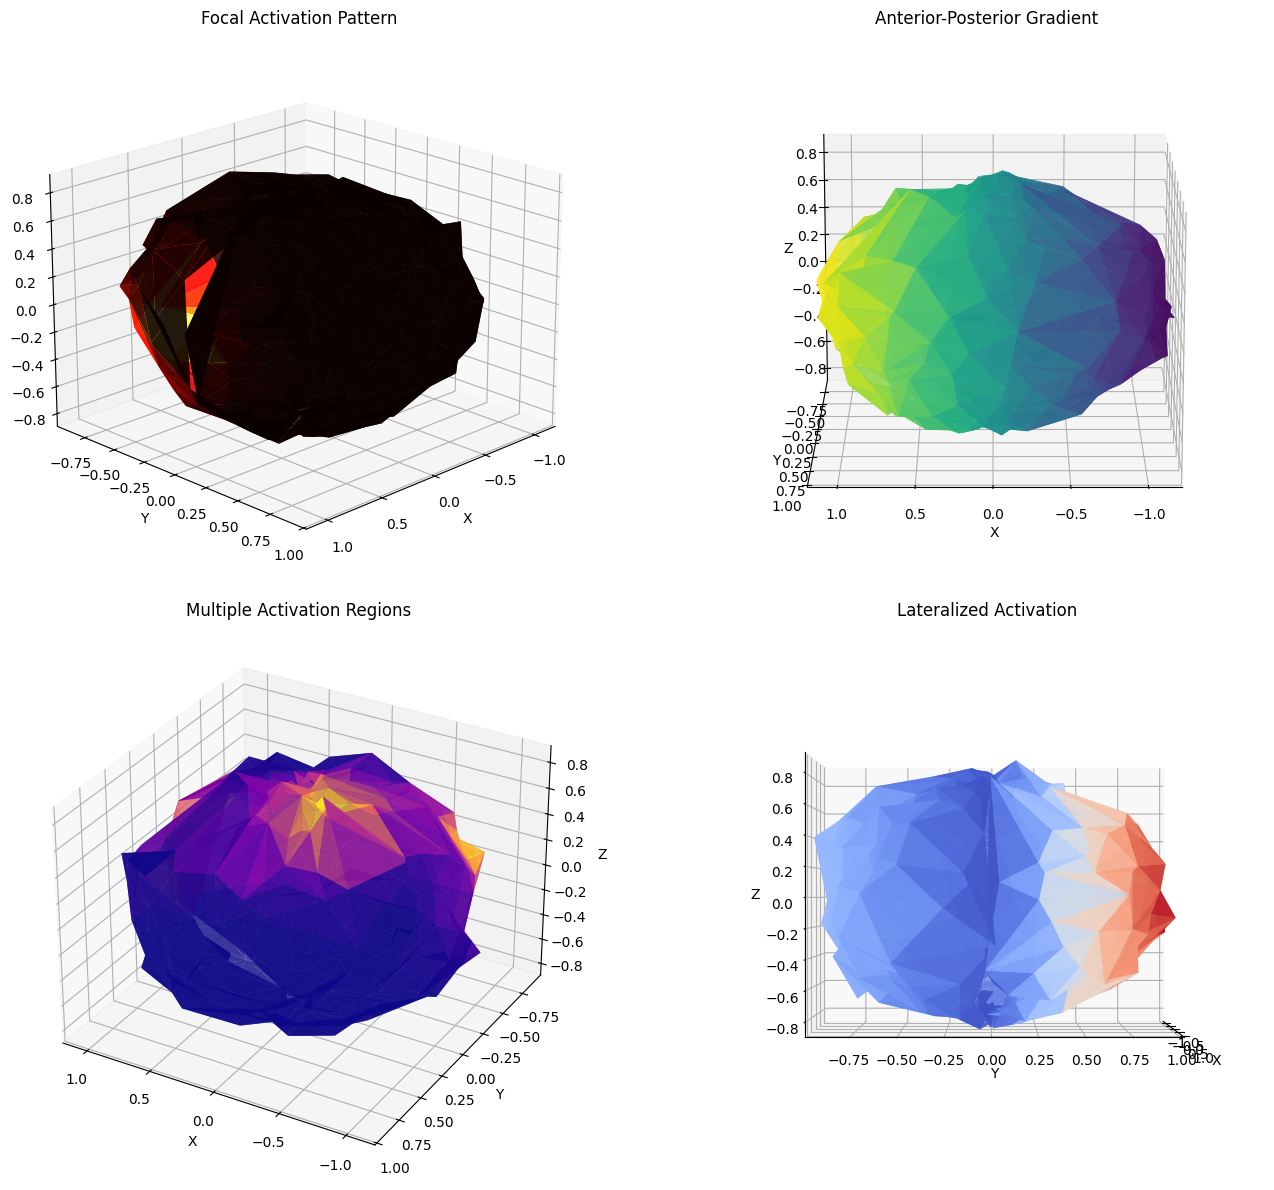


Brain Surface Visualization Applications:
- fMRI activation mapping
- EEG/MEG source localization
- Lesion mapping and visualization
- Functional connectivity on cortical surface
- Surgical planning and navigation


In [3]:
# Generate synthetic brain surface mesh
def create_brain_surface(n_points=500):
    """Generate a simplified brain-like surface mesh."""
    # Create ellipsoid-like shape
    theta = np.random.uniform(0, 2 * np.pi, n_points)
    phi = np.random.uniform(0, np.pi, n_points)

    # Brain-like proportions
    x = 1.2 * np.sin(phi) * np.cos(theta)
    y = 1.0 * np.sin(phi) * np.sin(theta)
    z = 0.8 * np.cos(phi)

    # Add some irregularity
    noise = 0.05
    x += np.random.normal(0, noise, n_points)
    y += np.random.normal(0, noise, n_points)
    z += np.random.normal(0, noise, n_points)

    vertices = np.column_stack([x, y, z])

    # Create faces using Delaunay triangulation
    # Project to 2D for triangulation
    tri = Delaunay(np.column_stack([theta, phi]))
    faces = tri.simplices

    return vertices, faces


# Generate brain surface
vertices, faces = create_brain_surface(n_points=300)

# Create different activation patterns
fig = plt.figure(figsize=(15, 12))

# Example 1: Focal activation (simulating fMRI response)
ax1 = fig.add_subplot(221, projection='3d')
# Create focal activation pattern
center = vertices[50]  # Activation center
distances = np.linalg.norm(vertices - center, axis=1)
focal_activation = np.exp(-distances ** 2 / 0.2)

brain_surface_3d(vertices, faces, values=focal_activation,
                 cmap='hot', alpha=0.9, ax=ax1,
                 title="Focal Activation Pattern")
ax1.view_init(elev=20, azim=45)

# Example 2: Gradient activation (anterior-posterior)
ax2 = fig.add_subplot(222, projection='3d')
gradient_activation = (vertices[:, 0] - vertices[:, 0].min()) / \
                      (vertices[:, 0].max() - vertices[:, 0].min())

brain_surface_3d(vertices, faces, values=gradient_activation,
                 cmap='viridis', alpha=0.85, ax=ax2,
                 title="Anterior-Posterior Gradient")
ax2.view_init(elev=15, azim=90)

# Example 3: Multiple activation regions
ax3 = fig.add_subplot(223, projection='3d')
# Create multiple activation centers
activation = np.zeros(len(vertices))
centers = [vertices[i] for i in [30, 100, 200]]
for center in centers:
    distances = np.linalg.norm(vertices - center, axis=1)
    activation += np.exp(-distances ** 2 / 0.15)

brain_surface_3d(vertices, faces, values=activation,
                 cmap='plasma', alpha=0.8, ax=ax3,
                 title="Multiple Activation Regions")
ax3.view_init(elev=30, azim=120)

# Example 4: Lateralized activation
ax4 = fig.add_subplot(224, projection='3d')
# Create lateralized pattern
lateral_activation = np.abs(vertices[:, 1])  # Lateral distance
lateral_activation[vertices[:, 1] < 0] *= 0.3  # Reduce left hemisphere

brain_surface_3d(vertices, faces, values=lateral_activation,
                 cmap='coolwarm', alpha=0.9, ax=ax4,
                 title="Lateralized Activation")
ax4.view_init(elev=0, azim=0)

plt.tight_layout()
plt.show()

print("\nBrain Surface Visualization Applications:")
print("- fMRI activation mapping")
print("- EEG/MEG source localization")
print("- Lesion mapping and visualization")
print("- Functional connectivity on cortical surface")
print("- Surgical planning and navigation")

## 3. 3D Connectivity Visualization Between Brain Regions

Understanding connectivity patterns between brain regions is crucial for network neuroscience. 3D visualization helps reveal the spatial organization of neural connections.

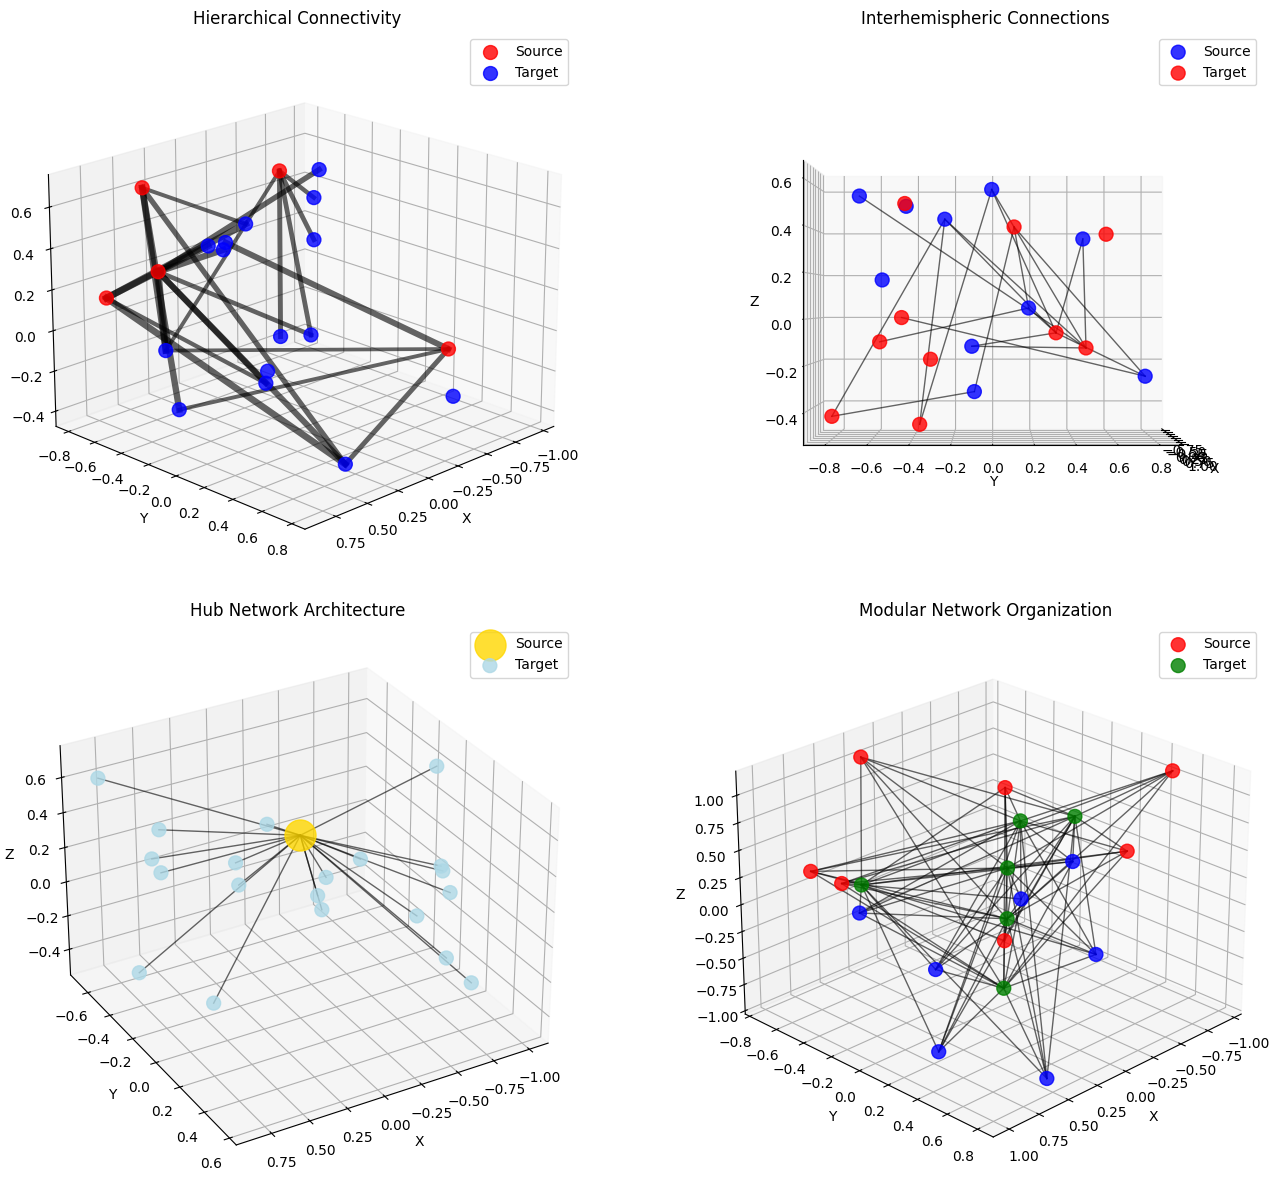


Connectivity Visualization Insights:
- Hierarchical: Information flow from few to many
- Interhemispheric: Cross-hemisphere communication
- Hub networks: Centralized processing
- Modular: Segregated functional units


In [4]:
# Generate brain region positions and connectivity
def generate_brain_regions(n_regions=20):
    """Generate positions for brain regions in 3D space."""
    # Create regions distributed in brain-like volume
    regions = []

    # Left hemisphere
    left_regions = n_regions // 2
    for i in range(left_regions):
        x = np.random.uniform(-1.0, -0.2)
        y = np.random.uniform(-0.8, 0.8)
        z = np.random.uniform(-0.5, 0.7)
        regions.append([x, y, z])

    # Right hemisphere
    right_regions = n_regions - left_regions
    for i in range(right_regions):
        x = np.random.uniform(0.2, 1.0)
        y = np.random.uniform(-0.8, 0.8)
        z = np.random.uniform(-0.5, 0.7)
        regions.append([x, y, z])

    return np.array(regions)


# Create different connectivity patterns
fig = plt.figure(figsize=(15, 12))

# Example 1: Hierarchical connectivity
ax1 = fig.add_subplot(221, projection='3d')
n_source = 5
n_target = 15
source_pos = generate_brain_regions(n_source)
target_pos = generate_brain_regions(n_target)

# Create hierarchical connections (few sources to many targets)
connections = np.zeros((n_source, n_target))
for i in range(n_source):
    # Each source connects to subset of targets
    n_connections = np.random.randint(3, 8)
    targets = np.random.choice(n_target, n_connections, replace=False)
    connections[i, targets] = np.random.uniform(0.5, 1.0, n_connections)

connectivity_3d(source_pos, target_pos, connections,
                connection_strengths=connections,
                ax=ax1, title="Hierarchical Connectivity")
ax1.view_init(elev=20, azim=45)

# Example 2: Interhemispheric connections
ax2 = fig.add_subplot(222, projection='3d')
left_pos = generate_brain_regions(10)
left_pos[:, 0] = np.abs(left_pos[:, 0]) * -1  # Ensure left side
right_pos = generate_brain_regions(10)
right_pos[:, 0] = np.abs(right_pos[:, 0])  # Ensure right side

# Create interhemispheric connections
inter_connections = np.random.rand(10, 10)
inter_connections[inter_connections < 0.7] = 0  # Sparse connections

connectivity_3d(left_pos, right_pos, inter_connections,
                node_colors=['blue'] * 10 + ['red'] * 10,
                ax=ax2, title="Interhemispheric Connections")
ax2.view_init(elev=0, azim=0)

# Example 3: Hub connectivity
ax3 = fig.add_subplot(223, projection='3d')
# Create hub and spoke pattern
hub_pos = np.array([[0, 0, 0.5]])  # Central hub
spoke_pos = generate_brain_regions(20)

# All spokes connect to hub
hub_connections = np.ones((1, 20)) * np.random.uniform(0.3, 1.0, 20)

connectivity_3d(hub_pos,
                spoke_pos,
                hub_connections,
                node_sizes=[500] + [100] * 20,
                node_colors=['gold'] + ['lightblue'] * 20,
                ax=ax3,
                title="Hub Network Architecture")
ax3.view_init(elev=30, azim=60)

# Example 4: Modular connectivity
ax4 = fig.add_subplot(224, projection='3d')
# Create three modules
module1 = generate_brain_regions(7)
module1[:, 2] += 0.5  # Top module
module2 = generate_brain_regions(7)
module2[:, 2] -= 0.5  # Bottom module
module3 = generate_brain_regions(6)

all_source = np.vstack([module1, module2])
all_target = module3

# Create modular connections
modular_connections = np.zeros((14, 6))
# Within-module connections (dense)
modular_connections[:7, :3] = np.random.uniform(0.7, 1.0, (7, 3))
modular_connections[7:, 3:] = np.random.uniform(0.7, 1.0, (7, 3))
# Between-module connections (sparse)
modular_connections[:7, 3:] = np.random.uniform(0, 0.3, (7, 3))
modular_connections[7:, :3] = np.random.uniform(0, 0.3, (7, 3))

colors_source = ['red'] * 7 + ['blue'] * 7
colors_target = ['green'] * 6

connectivity_3d(all_source,
                all_target,
                modular_connections,
                node_colors=colors_source + colors_target,
                ax=ax4,
                title="Modular Network Organization")
ax4.view_init(elev=25, azim=45)

plt.tight_layout()
plt.show()

print("\nConnectivity Visualization Insights:")
print("- Hierarchical: Information flow from few to many")
print("- Interhemispheric: Cross-hemisphere communication")
print("- Hub networks: Centralized processing")
print("- Modular: Segregated functional units")

## 4. Neural Trajectory Visualization in 3D State Space

Neural trajectories reveal how population activity evolves over time, providing insights into neural dynamics, decision-making processes, and state transitions.

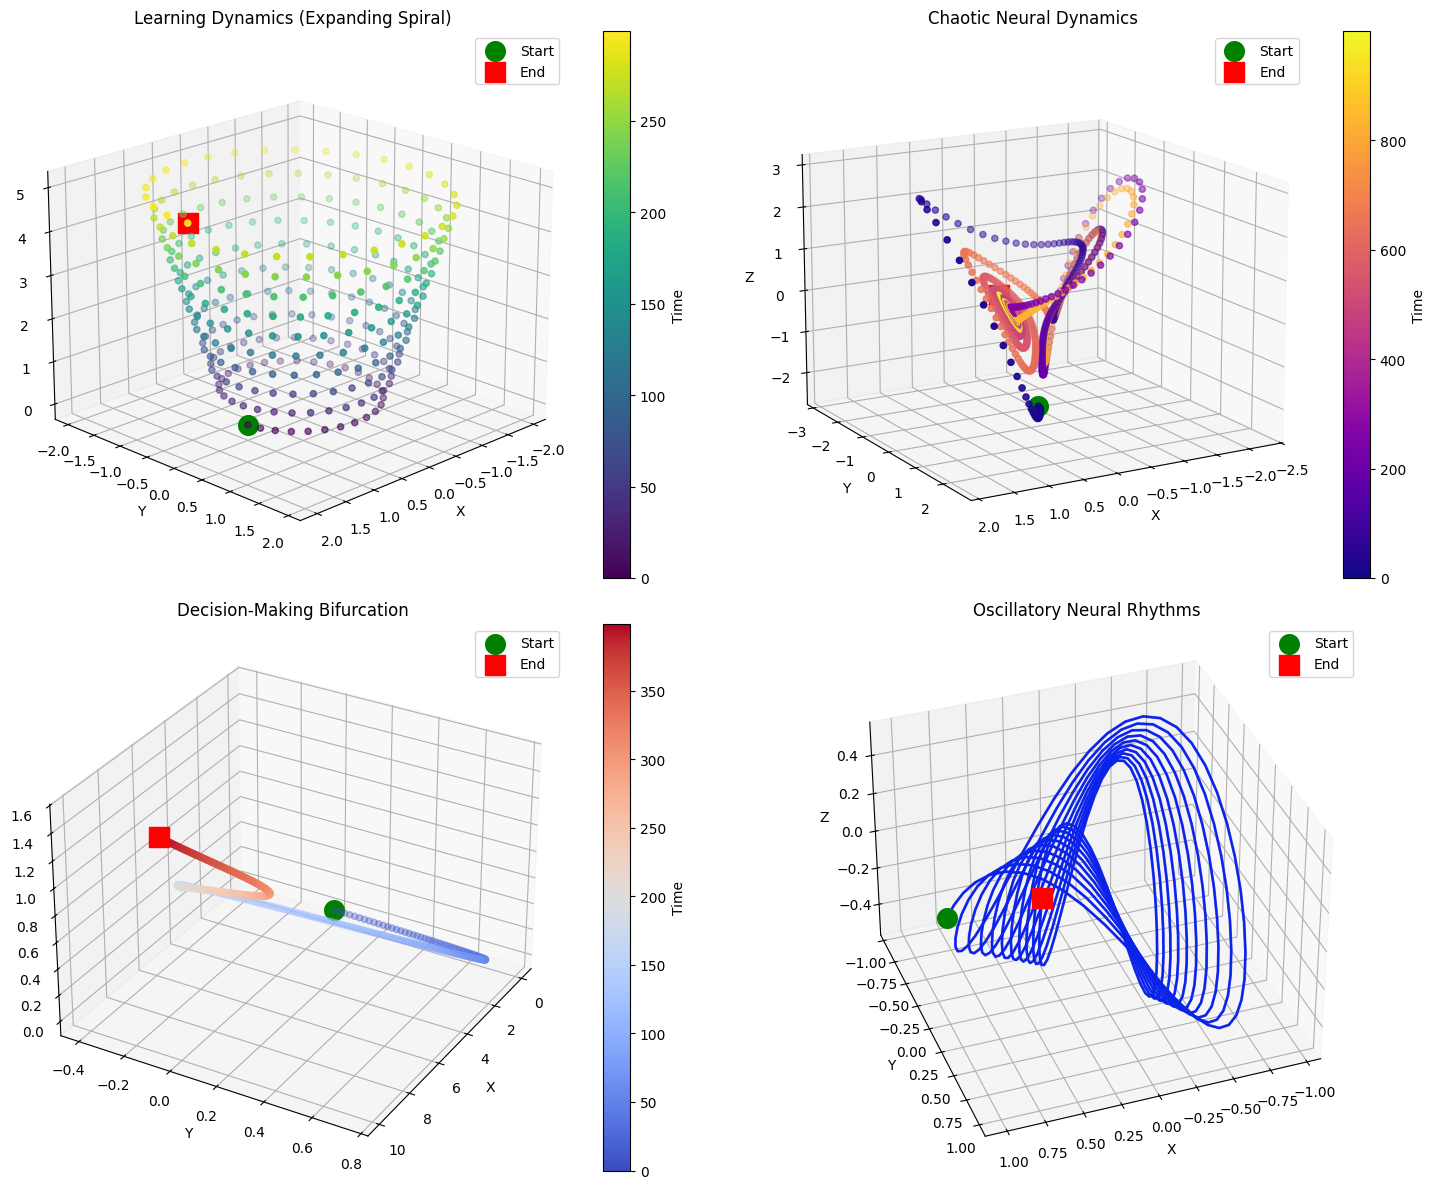


Neural Trajectory Analysis:
- Learning: Expanding trajectories indicate exploration
- Chaotic: Complex dynamics in recurrent networks
- Decision: Bifurcations represent choice points
- Oscillatory: Rhythmic patterns in neural populations
- Color gradients show temporal evolution


In [5]:
# Generate different types of neural trajectories
def generate_neural_trajectory(trajectory_type='spiral', n_points=500):
    """Generate different types of 3D neural trajectories."""
    t = np.linspace(0, 10, n_points)

    if trajectory_type == 'spiral':
        # Expanding spiral (learning dynamics)
        x = np.cos(2 * np.pi * t) * (1 + 0.1 * t)
        y = np.sin(2 * np.pi * t) * (1 + 0.1 * t)
        z = 0.5 * t

    elif trajectory_type == 'lorenz':
        # Lorenz attractor (chaotic dynamics)
        def lorenz(state, sigma=10, rho=28, beta=8 / 3):
            x, y, z = state
            dx = sigma * (y - x)
            dy = x * (rho - z) - y
            dz = x * y - beta * z
            return np.array([dx, dy, dz])

        dt = 0.01
        state = np.array([1., 1., 1.])
        trajectory = [state]

        for _ in range(n_points - 1):
            state = state + lorenz(state) * dt
            trajectory.append(state.copy())

        trajectory = np.array(trajectory)
        x, y, z = trajectory[:, 0], trajectory[:, 1], trajectory[:, 2]
        # Scale to reasonable range
        x = (x - x.mean()) / 10
        y = (y - y.mean()) / 10
        z = (z - z.mean()) / 10

    elif trajectory_type == 'decision':
        # Decision-making trajectory (bifurcation)
        x = t
        y = np.sin(t) * np.exp(-t / 5)
        # Bifurcation point
        z = np.zeros_like(t)
        z[t < 5] = 0.1 * t[t < 5]
        z[t >= 5] = 0.5 + 0.2 * (t[t >= 5] - 5) * np.sign(np.random.randn())

    elif trajectory_type == 'oscillatory':
        # Oscillatory dynamics (rhythmic activity)
        x = np.cos(2 * np.pi * t) * np.exp(-t / 10)
        y = np.sin(2 * np.pi * t) * np.exp(-t / 10)
        z = np.sin(4 * np.pi * t) * 0.5

    else:
        raise ValueError(f"Unknown trajectory type: {trajectory_type}")

    return np.column_stack([x, y, z])


# Visualize different trajectory types
fig = plt.figure(figsize=(15, 12))

# Example 1: Spiral learning dynamics
ax1 = fig.add_subplot(221, projection='3d')
trajectory1 = generate_neural_trajectory('spiral', 300)
trajectory_3d(trajectory1, time_colors=True, cmap='viridis',
              ax=ax1, title="Learning Dynamics (Expanding Spiral)")
ax1.view_init(elev=20, azim=45)

# Example 2: Chaotic dynamics
ax2 = fig.add_subplot(222, projection='3d')
trajectory2 = generate_neural_trajectory('lorenz', 1000)
trajectory_3d(trajectory2, time_colors=True, cmap='plasma',
              ax=ax2, title="Chaotic Neural Dynamics")
ax2.view_init(elev=15, azim=60)

# Example 3: Decision-making trajectory
ax3 = fig.add_subplot(223, projection='3d')
trajectory3 = generate_neural_trajectory('decision', 400)
trajectory_3d(trajectory3, time_colors=True, cmap='coolwarm',
              ax=ax3, title="Decision-Making Bifurcation")
ax3.view_init(elev=30, azim=30)

# Example 4: Oscillatory dynamics
ax4 = fig.add_subplot(224, projection='3d')
trajectory4 = generate_neural_trajectory('oscillatory', 500)
trajectory_3d(trajectory4, time_colors=False,
              ax=ax4, title="Oscillatory Neural Rhythms")
ax4.plot(trajectory4[:, 0], trajectory4[:, 1], trajectory4[:, 2],
         'b-', alpha=0.7, linewidth=2)
ax4.view_init(elev=35, azim=70)

plt.tight_layout()
plt.show()

print("\nNeural Trajectory Analysis:")
print("- Learning: Expanding trajectories indicate exploration")
print("- Chaotic: Complex dynamics in recurrent networks")
print("- Decision: Bifurcations represent choice points")
print("- Oscillatory: Rhythmic patterns in neural populations")
print("- Color gradients show temporal evolution")

## 5. Volume Rendering for 3D Neural Data

Volume rendering is essential for visualizing 3D imaging data such as calcium imaging stacks, MRI data, or dense neural recordings.

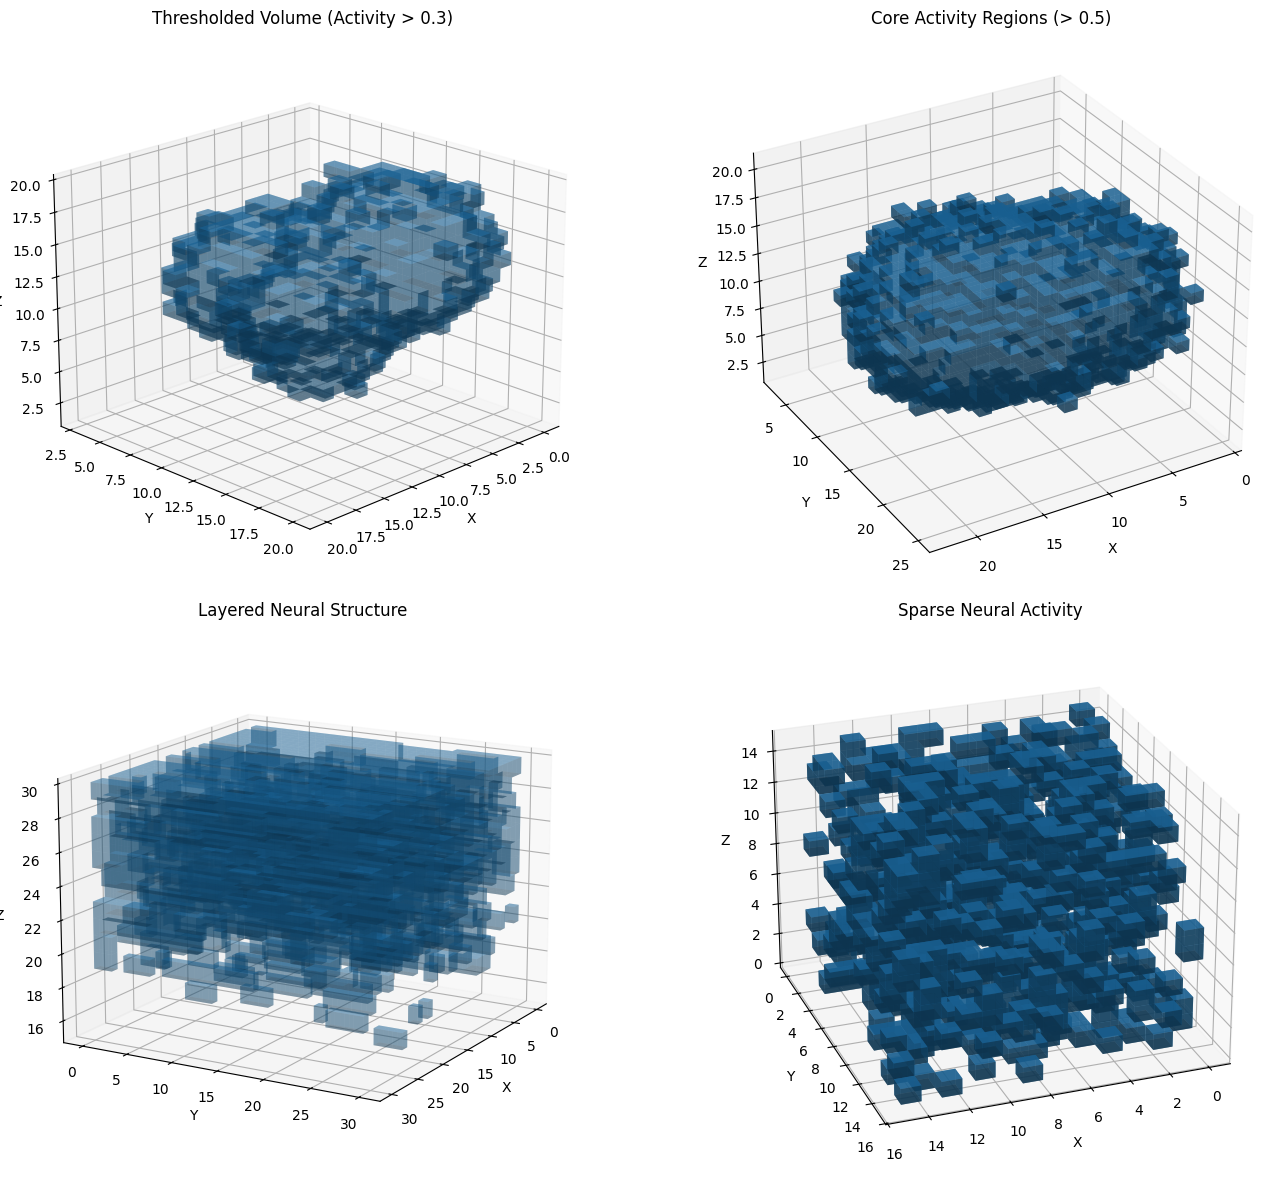


Volume Rendering Applications:
- Calcium imaging: 3D activity patterns
- fMRI/MRI: Brain structure and function
- Multi-electrode arrays: Spatial activity distribution
- Optical imaging: Tissue-wide neural dynamics
- Threshold selection reveals different activity levels


In [6]:
# Generate synthetic 3D neural volume data
def generate_neural_volume(shape=(30, 30, 30), n_sources=5):
    """Generate synthetic 3D volume data with neural activity sources."""
    volume = np.zeros(shape)

    for _ in range(n_sources):
        # Random source location
        center = np.random.randint(5, shape[0] - 5, 3)

        # Create 3D Gaussian source
        x, y, z = np.ogrid[:shape[0], :shape[1], :shape[2]]
        distances = np.sqrt((x - center[0]) ** 2 +
                            (y - center[1]) ** 2 +
                            (z - center[2]) ** 2)

        # Add source with random intensity
        intensity = np.random.uniform(0.5, 1.0)
        sigma = np.random.uniform(3, 6)
        volume += intensity * np.exp(-distances ** 2 / (2 * sigma ** 2))

    # Add noise
    volume += np.random.normal(0, 0.05, shape)
    volume = np.clip(volume, 0, 1)

    return volume


# Create different volume visualizations
fig = plt.figure(figsize=(15, 12))

# Example 1: Simple thresholded volume
ax1 = fig.add_subplot(221, projection='3d')
volume1 = generate_neural_volume((20, 20, 20), n_sources=3)
volume_rendering(volume1, threshold=0.3, alpha=0.4,
                 ax=ax1, title="Thresholded Volume (Activity > 0.3)")
ax1.view_init(elev=20, azim=45)

# Example 2: Higher threshold for core regions
ax2 = fig.add_subplot(222, projection='3d')
volume2 = generate_neural_volume((25, 25, 25), n_sources=4)
volume_rendering(volume2, threshold=0.5, alpha=0.6,
                 ax=ax2, title="Core Activity Regions (> 0.5)")
ax2.view_init(elev=30, azim=60)

# Example 3: Layered volume with gradient
ax3 = fig.add_subplot(223, projection='3d')
# Create layered structure
volume3 = np.zeros((30, 30, 30))
for z in range(30):
    layer_activity = np.random.rand(30, 30) * (z / 30)
    volume3[:, :, z] = gaussian_filter1d(layer_activity, sigma=2)

volume_rendering(volume3, threshold=0.4, alpha=0.3,
                 ax=ax3, title="Layered Neural Structure")
ax3.view_init(elev=15, azim=30)

# Example 4: Sparse activity volume
ax4 = fig.add_subplot(224, projection='3d')
# Create sparse activity
volume4 = np.random.rand(15, 15, 15)
volume4[volume4 < 0.8] = 0
volume4[volume4 > 0] = 1

volume_rendering(volume4, threshold=0.5, alpha=0.7,
                 ax=ax4, title="Sparse Neural Activity")
ax4.view_init(elev=25, azim=70)

plt.tight_layout()
plt.show()

print("\nVolume Rendering Applications:")
print("- Calcium imaging: 3D activity patterns")
print("- fMRI/MRI: Brain structure and function")
print("- Multi-electrode arrays: Spatial activity distribution")
print("- Optical imaging: Tissue-wide neural dynamics")
print("- Threshold selection reveals different activity levels")

## 6. Electrode Array Visualization in 3D Space

Visualizing electrode arrays and their recorded signals in 3D helps understand the spatial distribution of neural recordings and signal characteristics.

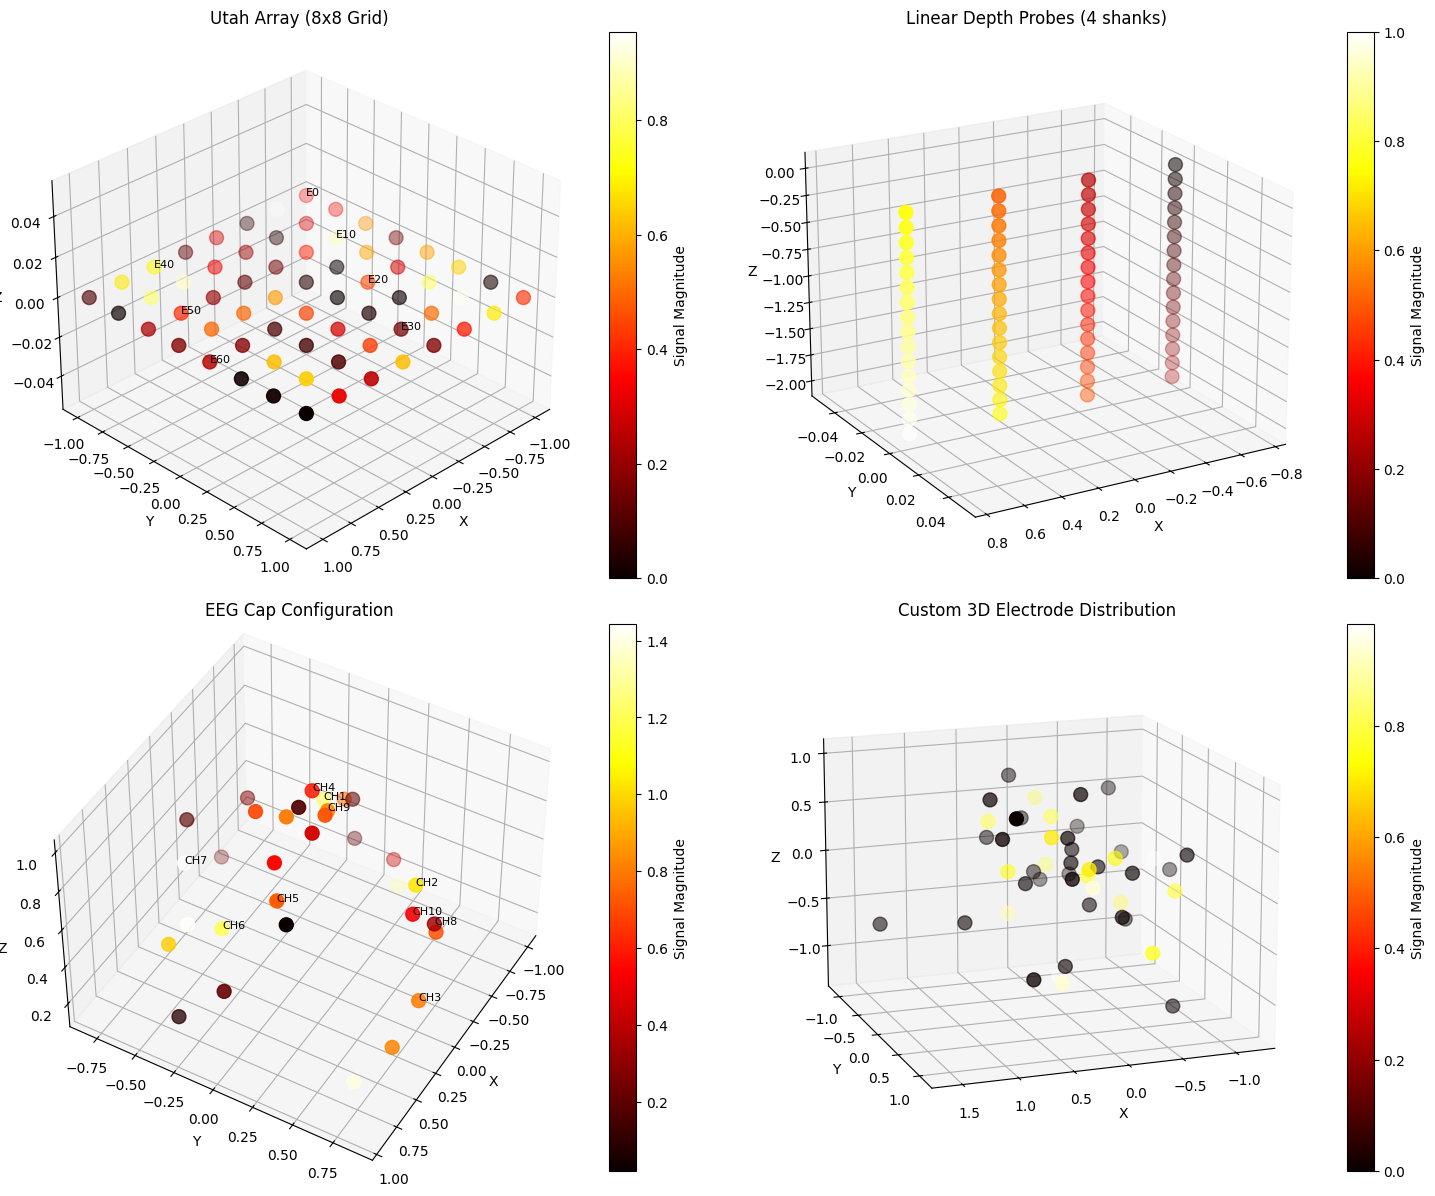


Electrode Array Visualization Features:
- Utah arrays: High-density surface recordings
- Depth probes: Laminar recordings across cortical layers
- EEG caps: Scalp-wide brain activity monitoring
- Signal magnitude shown by color intensity
- Labels help identify specific recording sites


In [7]:
# Generate different electrode array configurations
def generate_electrode_array(array_type='grid', n_electrodes=64):
    """Generate different electrode array configurations."""

    if array_type == 'grid':
        # Utah array style grid
        grid_size = int(np.sqrt(n_electrodes))
        x = np.repeat(np.linspace(-1, 1, grid_size), grid_size)
        y = np.tile(np.linspace(-1, 1, grid_size), grid_size)
        z = np.zeros(n_electrodes)
        positions = np.column_stack([x, y, z])

    elif array_type == 'depth':
        # Linear depth probes
        n_shanks = 4
        n_per_shank = n_electrodes // n_shanks
        positions = []
        for shank in range(n_shanks):
            x = np.ones(n_per_shank) * (shank - 1.5) * 0.5
            y = np.zeros(n_per_shank)
            z = np.linspace(0, -2, n_per_shank)
            positions.append(np.column_stack([x, y, z]))
        positions = np.vstack(positions)

    elif array_type == 'eeg':
        # EEG cap style (spherical distribution)
        theta = np.random.uniform(0, 2 * np.pi, n_electrodes)
        phi = np.random.uniform(0, np.pi / 2, n_electrodes)  # Upper hemisphere
        x = np.sin(phi) * np.cos(theta)
        y = np.sin(phi) * np.sin(theta)
        z = np.cos(phi)
        positions = np.column_stack([x, y, z])

    elif array_type == 'custom':
        # Custom 3D distribution
        positions = np.random.randn(n_electrodes, 3) * 0.5

    else:
        raise ValueError(f"Unknown array type: {array_type}")

    return positions


# Generate synthetic signals for electrodes
def generate_electrode_signals(n_electrodes, signal_type='oscillatory'):
    """Generate synthetic signals for electrodes."""
    if signal_type == 'oscillatory':
        # Different frequencies for different electrodes
        signals = np.array([np.sin(2 * np.pi * f * 0.1) * np.random.rand()
                            for f in np.linspace(1, 10, n_electrodes)])
    elif signal_type == 'random':
        signals = np.random.randn(n_electrodes)
    elif signal_type == 'spatial_gradient':
        signals = np.linspace(0, 1, n_electrodes)
    else:
        signals = np.ones(n_electrodes) * 0.5

    return signals


# Visualize different electrode configurations
fig = plt.figure(figsize=(15, 12))

# Example 1: Utah array with signal magnitudes
ax1 = fig.add_subplot(221, projection='3d')
utah_positions = generate_electrode_array('grid', 64)
utah_signals = generate_electrode_signals(64, 'oscillatory')
electrode_labels = [f'E{i}' if i % 10 == 0 else '' for i in range(64)]

electrode_array_3d(utah_positions, signals=utah_signals,
                   electrode_labels=electrode_labels,
                   ax=ax1, title="Utah Array (8x8 Grid)")
ax1.view_init(elev=30, azim=45)

# Example 2: Depth probes
ax2 = fig.add_subplot(222, projection='3d')
depth_positions = generate_electrode_array('depth', 64)
depth_signals = generate_electrode_signals(64, 'spatial_gradient')

electrode_array_3d(depth_positions, signals=depth_signals,
                   ax=ax2, title="Linear Depth Probes (4 shanks)")
ax2.view_init(elev=20, azim=60)

# Example 3: EEG cap configuration
ax3 = fig.add_subplot(223, projection='3d')
eeg_positions = generate_electrode_array('eeg', 32)
eeg_signals = generate_electrode_signals(32, 'random')
eeg_labels = [f'CH{i + 1}' for i in range(32)]

electrode_array_3d(eeg_positions, signals=np.abs(eeg_signals),
                   electrode_labels=eeg_labels[:10],  # Show subset of labels
                   ax=ax3, title="EEG Cap Configuration")
ax3.view_init(elev=45, azim=30)

# Example 4: Custom 3D array
ax4 = fig.add_subplot(224, projection='3d')
custom_positions = generate_electrode_array('custom', 48)
# Create clustered signals
custom_signals = np.zeros(48)
cluster_centers = [12, 24, 36]
for center in cluster_centers:
    custom_signals[center - 3:center + 3] = np.random.uniform(0.7, 1.0, 6)

electrode_array_3d(custom_positions, signals=custom_signals,
                   ax=ax4, title="Custom 3D Electrode Distribution")
ax4.view_init(elev=15, azim=70)

plt.tight_layout()
plt.show()

print("\nElectrode Array Visualization Features:")
print("- Utah arrays: High-density surface recordings")
print("- Depth probes: Laminar recordings across cortical layers")
print("- EEG caps: Scalp-wide brain activity monitoring")
print("- Signal magnitude shown by color intensity")
print("- Labels help identify specific recording sites")

## 7. Dendrite Tree Visualization

Visualizing dendritic structures is crucial for understanding neuronal morphology and computational properties.

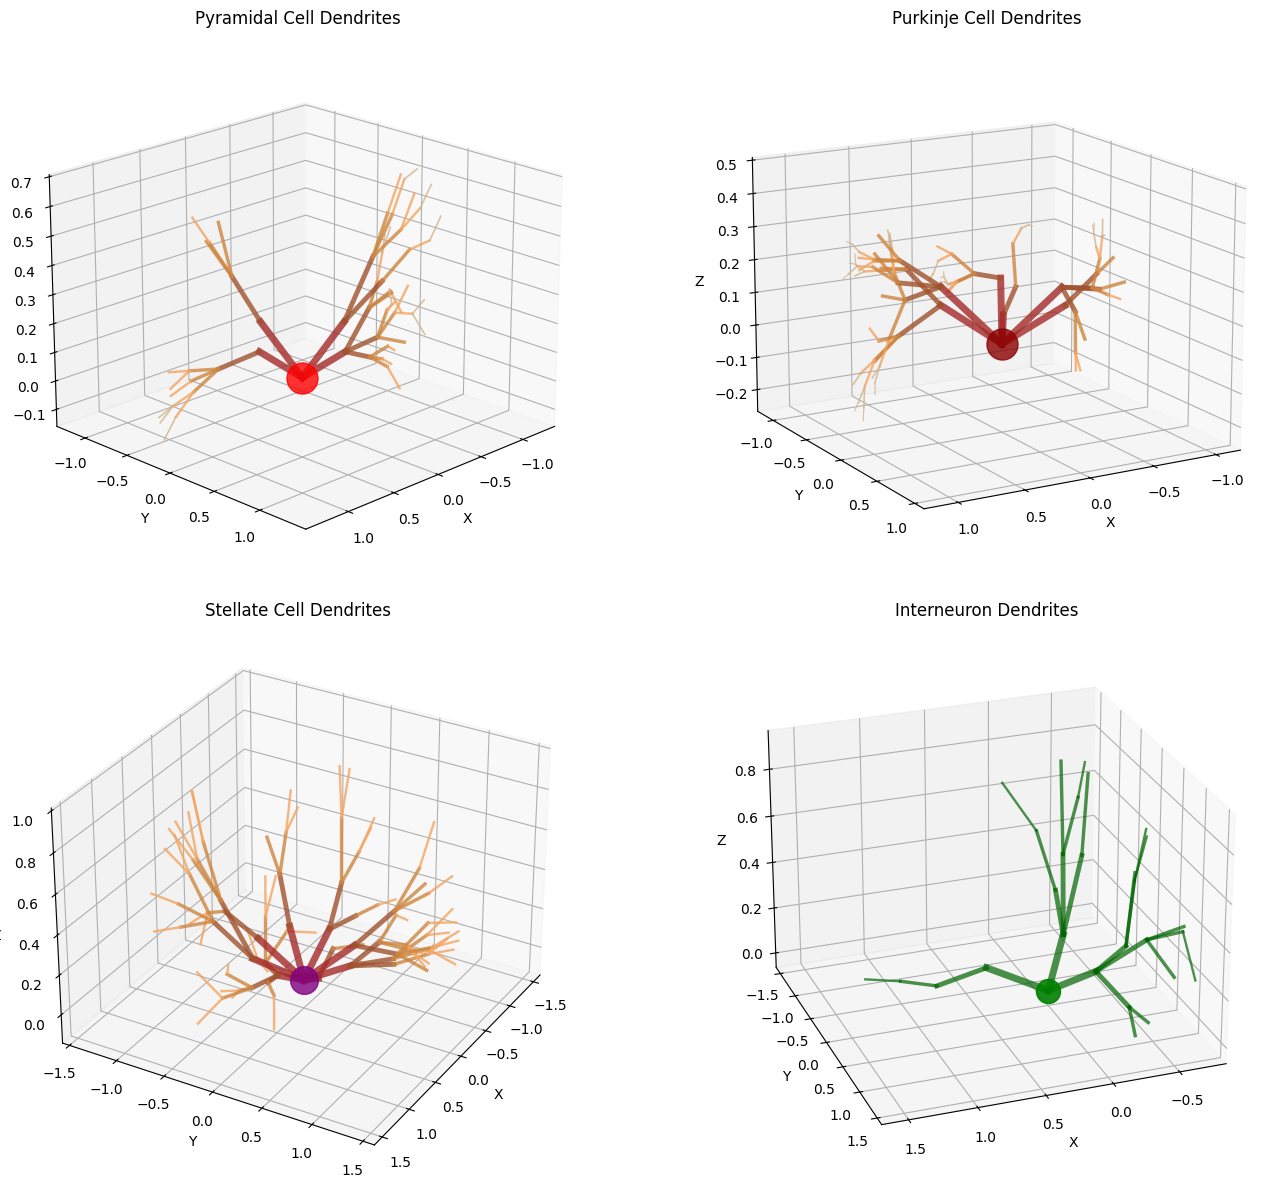


Dendritic Tree Visualization:
- Branch diameter indicates signal propagation properties
- Color coding shows branching depth/order
- Morphology relates to computational function
- Pyramidal: Extensive apical and basal dendrites
- Purkinje: Elaborate dendritic arbor
- Stellate: Radially symmetric
- Interneuron: Compact, local processing


In [8]:
# Generate synthetic dendritic tree structure
def generate_dendrite_tree(n_branches=5, max_depth=4, branch_factor=0.7):
    """Generate a synthetic dendritic tree structure."""
    segments = []
    diameters = []
    colors = []

    def add_branch(start_point, direction, depth, diameter):
        if depth > max_depth:
            return

        # Branch length decreases with depth
        length = 0.5 * (branch_factor ** depth)
        end_point = start_point + direction * length

        segments.append((start_point, end_point))
        diameters.append(diameter)

        # Color based on depth
        color_map = ['brown', 'sienna', 'peru', 'sandybrown', 'tan']
        colors.append(color_map[min(depth, 4)])

        # Generate child branches
        n_children = np.random.randint(1, 4) if depth < 2 else np.random.randint(0, 3)

        for _ in range(n_children):
            # Random perturbation in direction
            new_direction = direction + np.random.randn(3) * 0.3
            new_direction = new_direction / np.linalg.norm(new_direction)

            # Diameter decreases with branching
            new_diameter = diameter * 0.7

            add_branch(end_point, new_direction, depth + 1, new_diameter)

    # Create main dendrite trunk
    soma_position = np.array([0, 0, 0])

    # Generate primary dendrites
    for i in range(n_branches):
        angle = (2 * np.pi * i) / n_branches
        direction = np.array([np.cos(angle), np.sin(angle), 0.3])
        direction = direction / np.linalg.norm(direction)
        add_branch(soma_position, direction, 0, 0.5)

    return segments, diameters, colors


# Create different dendritic morphologies
fig = plt.figure(figsize=(15, 12))

# Example 1: Pyramidal cell dendrite
ax1 = fig.add_subplot(221, projection='3d')
segments1, diameters1, colors1 = generate_dendrite_tree(n_branches=4, max_depth=4)

dendrite_tree_3d(segments1, diameters=diameters1, colors=colors1,
                 ax=ax1, title="Pyramidal Cell Dendrites")

# Add soma
ax1.scatter([0], [0], [0], s=500, c='red', alpha=0.8, label='Soma')
ax1.view_init(elev=20, azim=45)

# Example 2: Purkinje cell (more branches)
ax2 = fig.add_subplot(222, projection='3d')
segments2, diameters2, colors2 = generate_dendrite_tree(n_branches=6, max_depth=5,
                                                        branch_factor=0.6)

dendrite_tree_3d(segments2, diameters=diameters2, colors=colors2,
                 ax=ax2, title="Purkinje Cell Dendrites")
ax2.scatter([0], [0], [0], s=500, c='darkred', alpha=0.8)
ax2.view_init(elev=15, azim=60)

# Example 3: Stellate cell (radial symmetry)
ax3 = fig.add_subplot(223, projection='3d')
segments3, diameters3, colors3 = generate_dendrite_tree(n_branches=8, max_depth=3,
                                                        branch_factor=0.8)

dendrite_tree_3d(segments3, diameters=diameters3, colors=colors3,
                 ax=ax3, title="Stellate Cell Dendrites")
ax3.scatter([0], [0], [0], s=400, c='purple', alpha=0.8)
ax3.view_init(elev=30, azim=30)

# Example 4: Interneuron (sparse branching)
ax4 = fig.add_subplot(224, projection='3d')
segments4, diameters4, colors4 = generate_dendrite_tree(n_branches=3, max_depth=3,
                                                        branch_factor=0.9)

# Use uniform color for this example
uniform_colors = ['darkgreen'] * len(segments4)
dendrite_tree_3d(segments4, diameters=diameters4, colors=uniform_colors,
                 ax=ax4, title="Interneuron Dendrites", alpha=0.7)
ax4.scatter([0], [0], [0], s=300, c='green', alpha=0.9)
ax4.view_init(elev=25, azim=70)

plt.tight_layout()
plt.show()

print("\nDendritic Tree Visualization:")
print("- Branch diameter indicates signal propagation properties")
print("- Color coding shows branching depth/order")
print("- Morphology relates to computational function")
print("- Pyramidal: Extensive apical and basal dendrites")
print("- Purkinje: Elaborate dendritic arbor")
print("- Stellate: Radially symmetric")
print("- Interneuron: Compact, local processing")

## 8. 3D Phase Space Analysis

Phase space visualization reveals the dynamics of neural systems by plotting state variables against each other, showing attractors, limit cycles, and bifurcations.

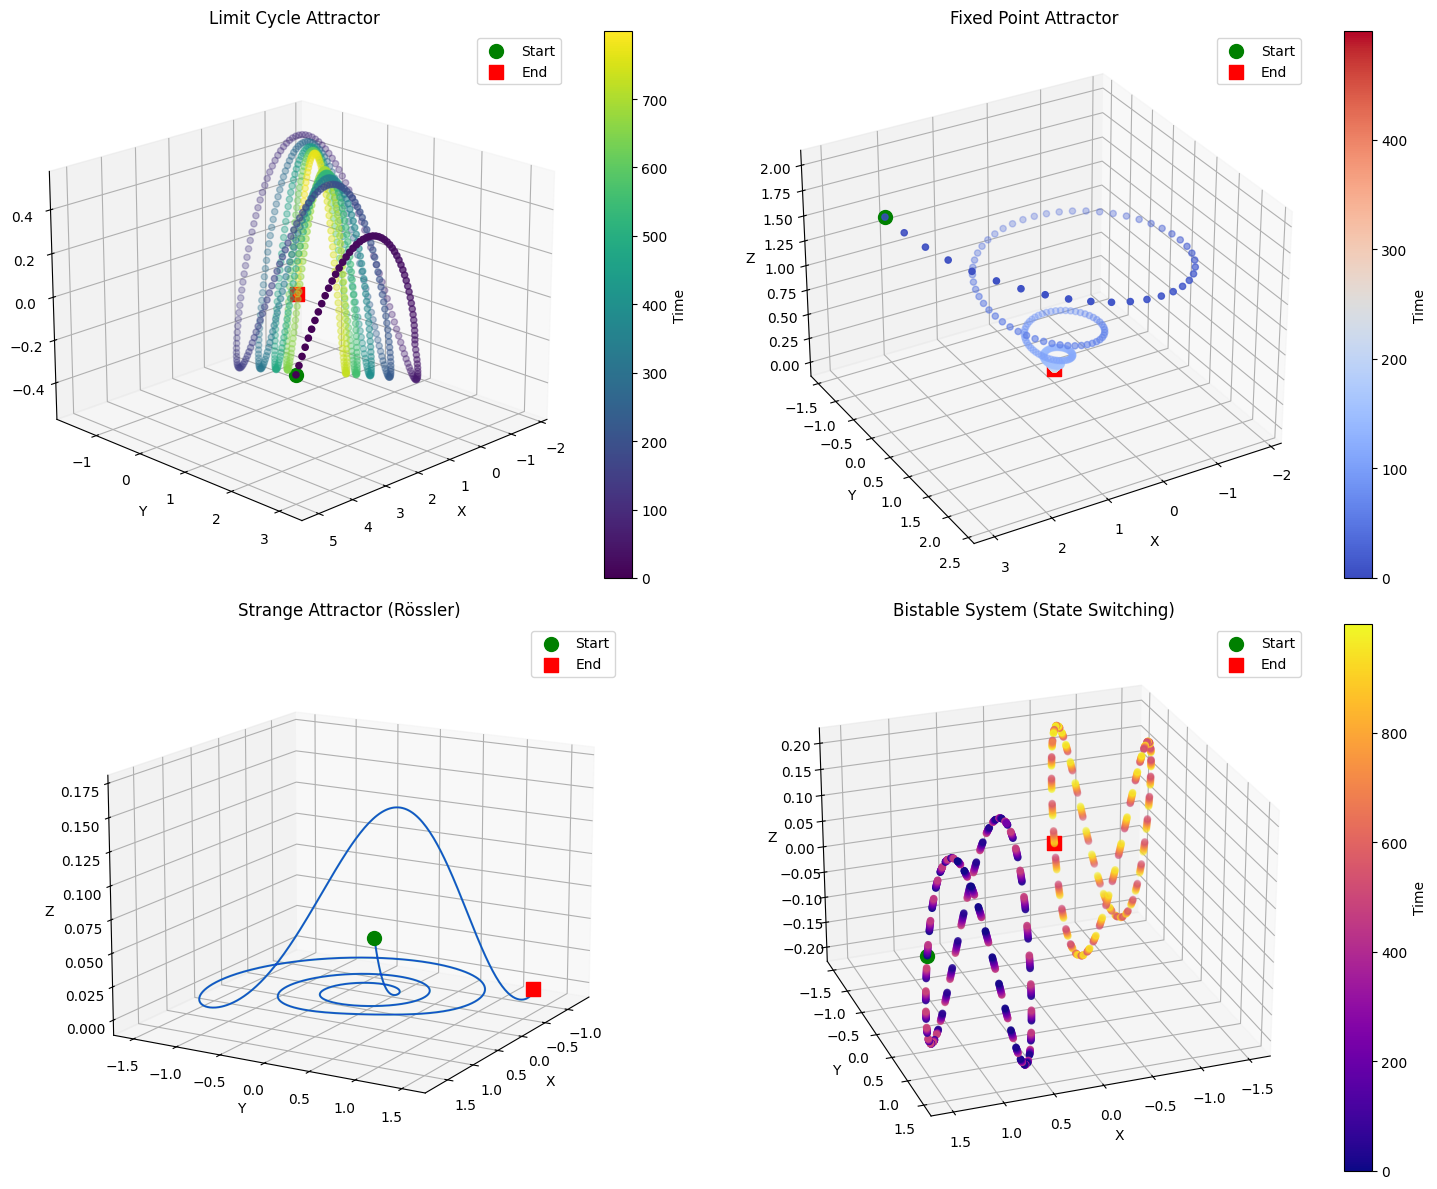


Phase Space Analysis Insights:
- Limit cycles: Periodic neural oscillations
- Fixed points: Stable resting states
- Strange attractors: Chaotic dynamics
- Bistable systems: Multiple stable states
- Trajectories reveal system dynamics
- Color gradients show temporal evolution


In [9]:
# Generate different dynamical systems
def generate_dynamical_system(system_type='limit_cycle', n_points=1000):
    """Generate trajectories for different dynamical systems."""

    if system_type == 'limit_cycle':
        # Van der Pol oscillator in 3D
        t = np.linspace(0, 30, n_points)
        mu = 1.0

        # Simplified simulation
        x = 2 * np.cos(t) * np.exp(-t / 20)
        y = 2 * np.sin(t) * np.exp(-t / 20)
        z = 0.5 * np.sin(2 * t)

        # Add transient to limit cycle
        x[:50] += np.linspace(3, 0, 50)
        y[:50] += np.linspace(3, 0, 50)

    elif system_type == 'fixed_point':
        # Convergence to fixed point
        t = np.linspace(0, 10, n_points)
        x = 3 * np.exp(-t) * np.cos(2 * np.pi * t)
        y = 3 * np.exp(-t) * np.sin(2 * np.pi * t)
        z = 2 * np.exp(-t)

    elif system_type == 'strange_attractor':
        # Rössler attractor
        def rossler(state, a=0.2, b=0.2, c=5.7):
            x, y, z = state
            dx = -y - z
            dy = x + a * y
            dz = b + z * (x - c)
            return np.array([dx, dy, dz])

        dt = 0.01
        state = np.array([1., 1., 1.])
        trajectory = [state]

        for _ in range(n_points - 1):
            state = state + rossler(state) * dt
            trajectory.append(state.copy())

        trajectory = np.array(trajectory)
        x = trajectory[:, 0] / 5
        y = trajectory[:, 1] / 5
        z = trajectory[:, 2] / 20

    elif system_type == 'bistable':
        # Bistable system with two attractors
        t = np.linspace(0, 20, n_points)
        # Switch between states
        state1_mask = t < 10
        state2_mask = t >= 10

        x = np.zeros(n_points)
        y = np.zeros(n_points)
        z = np.zeros(n_points)

        # State 1: oscillation around (1, 1, 0)
        x[state1_mask] = 1 + 0.5 * np.cos(2 * np.pi * t[state1_mask])
        y[state1_mask] = 1 + 0.5 * np.sin(2 * np.pi * t[state1_mask])
        z[state1_mask] = 0.2 * np.sin(4 * np.pi * t[state1_mask])

        # Transition
        transition = np.linspace(0, 1, 50)

        # State 2: oscillation around (-1, -1, 0)
        x[state2_mask] = -1 + 0.5 * np.cos(2 * np.pi * t[state2_mask])
        y[state2_mask] = -1 + 0.5 * np.sin(2 * np.pi * t[state2_mask])
        z[state2_mask] = -0.2 * np.sin(4 * np.pi * t[state2_mask])

    else:
        raise ValueError(f"Unknown system type: {system_type}")

    return x, y, z


# Visualize different phase space dynamics
fig = plt.figure(figsize=(15, 12))

# Example 1: Limit cycle
ax1 = fig.add_subplot(221, projection='3d')
x1, y1, z1 = generate_dynamical_system('limit_cycle', 800)
phase_space_3d(x1, y1, z1, time_colors=True, cmap='viridis',
               ax=ax1, title="Limit Cycle Attractor")
ax1.view_init(elev=20, azim=45)

# Example 2: Fixed point attractor
ax2 = fig.add_subplot(222, projection='3d')
x2, y2, z2 = generate_dynamical_system('fixed_point', 500)
phase_space_3d(x2, y2, z2, time_colors=True, cmap='coolwarm',
               ax=ax2, title="Fixed Point Attractor")
ax2.view_init(elev=30, azim=60)

# Example 3: Strange attractor
ax3 = fig.add_subplot(223, projection='3d')
x3, y3, z3 = generate_dynamical_system('strange_attractor', 2000)
phase_space_3d(x3, y3, z3, time_colors=False,
               ax=ax3, title="Strange Attractor (Rössler)")
ax3.plot(x3, y3, z3, 'b-', alpha=0.5, linewidth=0.5)
ax3.view_init(elev=15, azim=30)

# Example 4: Bistable system
ax4 = fig.add_subplot(224, projection='3d')
x4, y4, z4 = generate_dynamical_system('bistable', 1000)
phase_space_3d(x4, y4, z4, time_colors=True, cmap='plasma',
               ax=ax4, title="Bistable System (State Switching)")
ax4.view_init(elev=25, azim=70)

plt.tight_layout()
plt.show()

print("\nPhase Space Analysis Insights:")
print("- Limit cycles: Periodic neural oscillations")
print("- Fixed points: Stable resting states")
print("- Strange attractors: Chaotic dynamics")
print("- Bistable systems: Multiple stable states")
print("- Trajectories reveal system dynamics")
print("- Color gradients show temporal evolution")

## 9. Comprehensive 3D Neural Visualization Dashboard

Let's combine multiple 3D visualization techniques to create a comprehensive view of neural system dynamics.

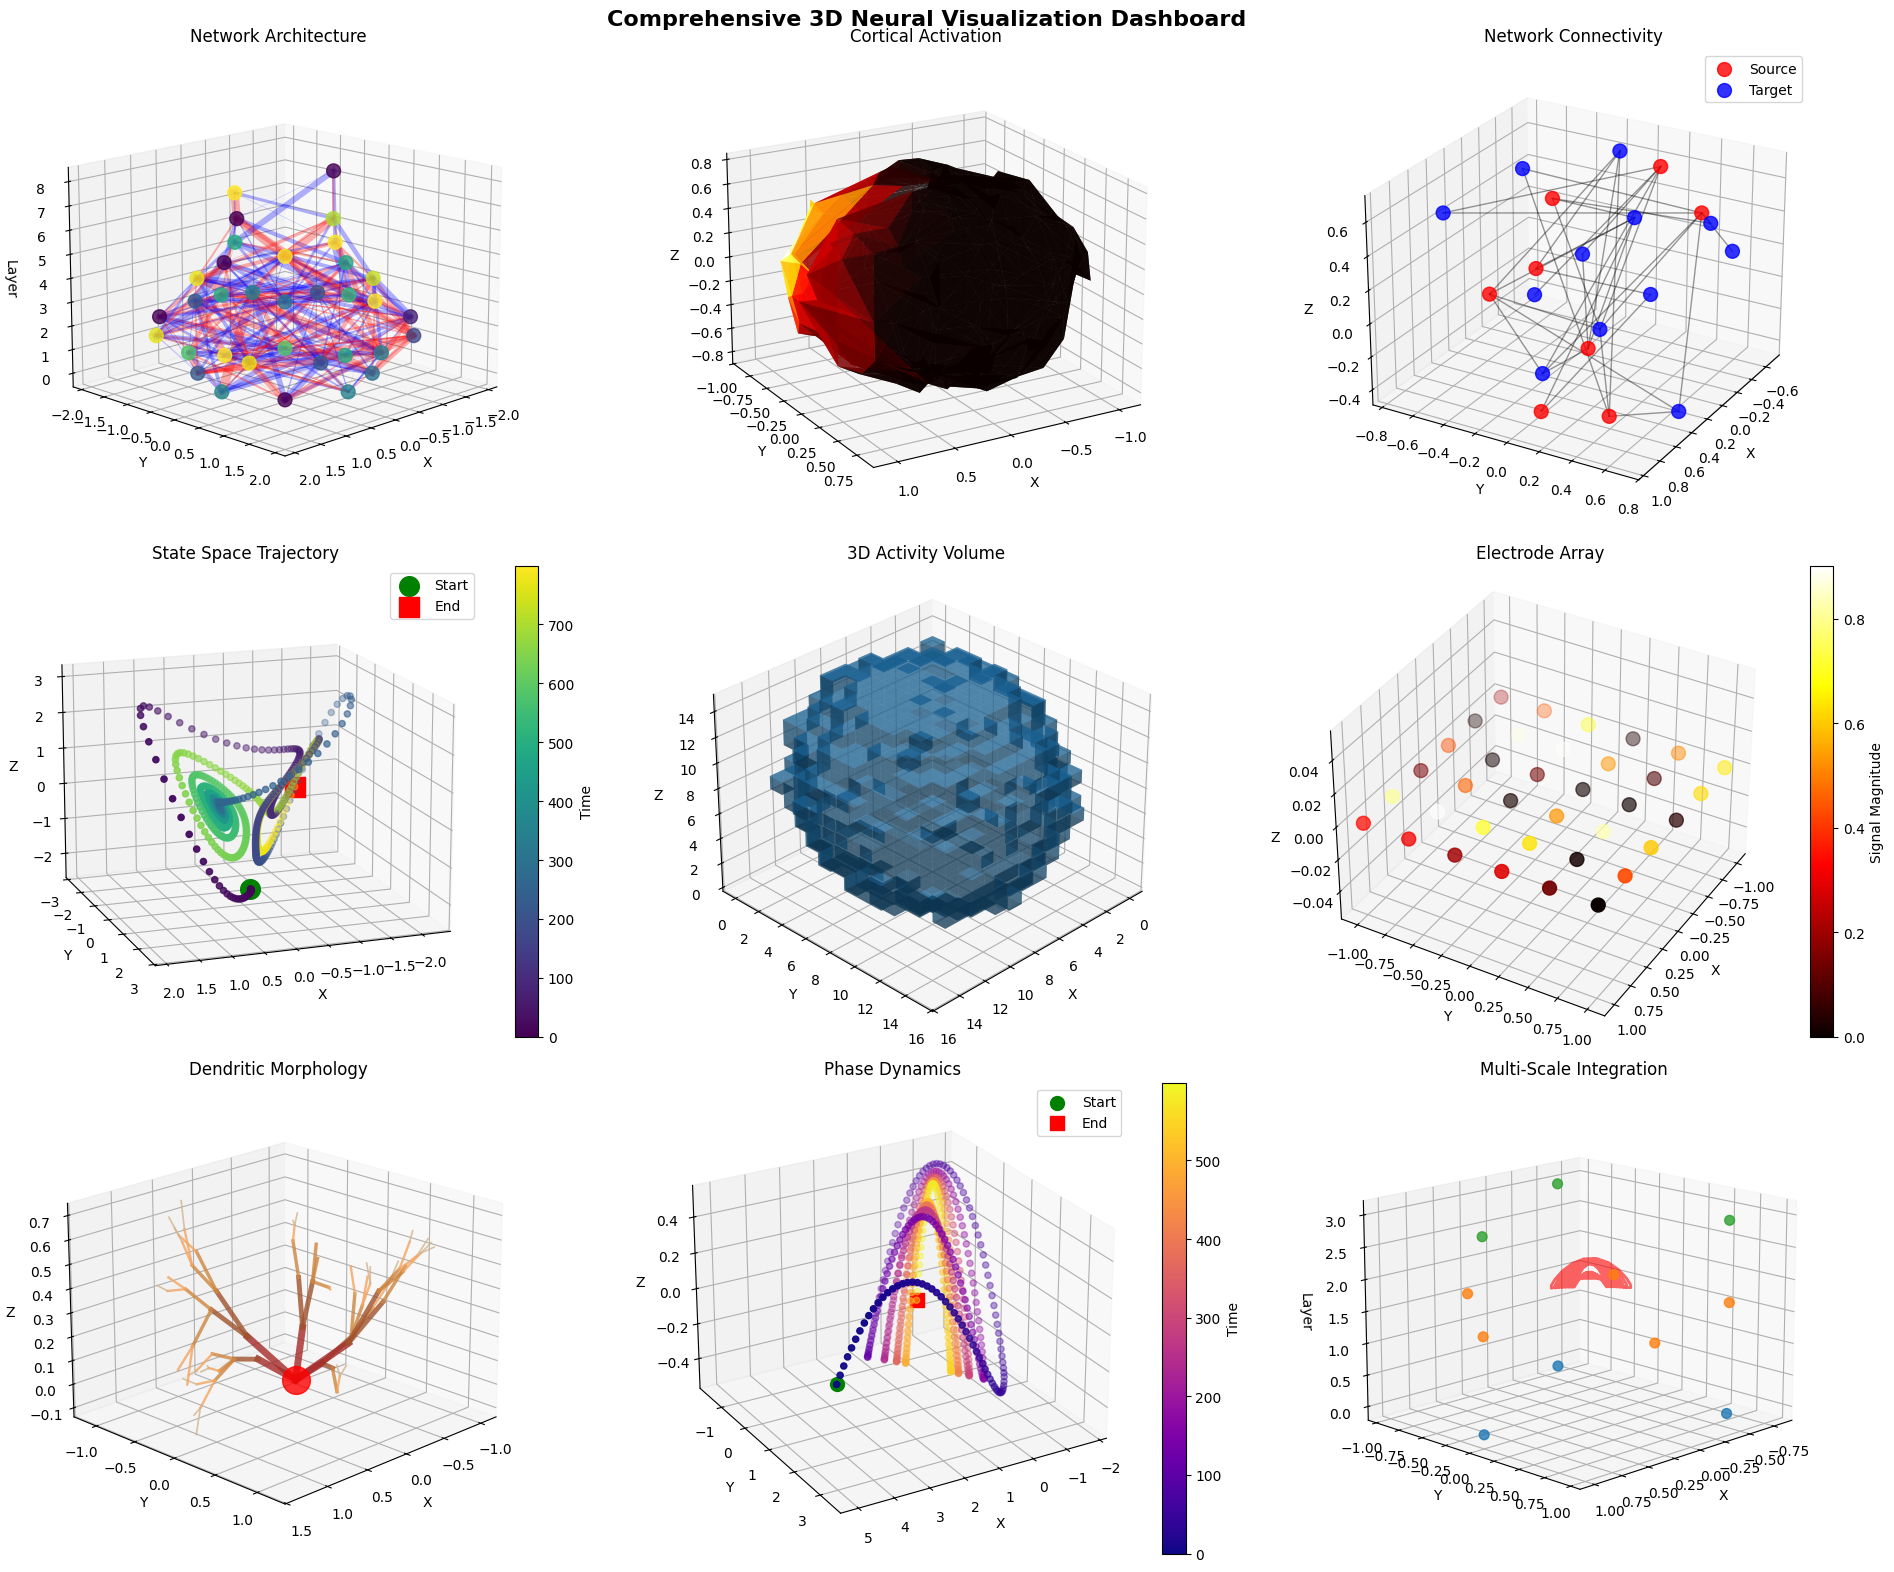


3D Visualization Dashboard Summary:
This dashboard demonstrates the integration of multiple
3D visualization techniques for comprehensive neural analysis:

1. Network Architecture: Layer structure and connections
2. Cortical Activation: Spatial activity patterns
3. Connectivity: Inter-region communication
4. State Trajectories: Dynamical evolution
5. Volume Data: 3D activity distributions
6. Recording Arrays: Electrode configurations
7. Cell Morphology: Dendritic structures
8. Phase Dynamics: System state evolution
9. Multi-scale: Combined visualizations


In [10]:
# Create comprehensive 3D visualization dashboard
fig = plt.figure(figsize=(20, 16))

# 1. Neural network architecture (top-left)
ax1 = fig.add_subplot(331, projection='3d')
network_layers = [8, 12, 8, 4, 2]
network_weights = [np.random.randn(network_layers[i], network_layers[i + 1]) * 0.5
                   for i in range(len(network_layers) - 1)]
network_activations = [np.random.rand(size) for size in network_layers]

neural_network_3d(network_layers, weights=network_weights,
                  activations=network_activations,
                  ax=ax1, title="Network Architecture",
                  layer_spacing=2.0, node_size=100)
ax1.view_init(elev=15, azim=45)

# 2. Brain surface with activation (top-center)
ax2 = fig.add_subplot(332, projection='3d')
surf_vertices, surf_faces = create_brain_surface(n_points=250)
# Create activation hotspot
hotspot_center = surf_vertices[100]
surf_distances = np.linalg.norm(surf_vertices - hotspot_center, axis=1)
surf_activation = np.exp(-surf_distances ** 2 / 0.3)

brain_surface_3d(surf_vertices, surf_faces, values=surf_activation,
                 cmap='hot', alpha=0.85, ax=ax2,
                 title="Cortical Activation")
ax2.view_init(elev=20, azim=60)

# 3. Connectivity network (top-right)
ax3 = fig.add_subplot(333, projection='3d')
conn_source = generate_brain_regions(8)
conn_target = generate_brain_regions(12)
conn_matrix = np.random.rand(8, 12)
conn_matrix[conn_matrix < 0.6] = 0

connectivity_3d(conn_source, conn_target, conn_matrix,
                edge_alpha=0.4, ax=ax3,
                title="Network Connectivity")
ax3.view_init(elev=25, azim=30)

# 4. Neural trajectory (middle-left)
ax4 = fig.add_subplot(334, projection='3d')
traj_data = generate_neural_trajectory('lorenz', 800)
trajectory_3d(traj_data, time_colors=True, cmap='viridis',
              ax=ax4, title="State Space Trajectory")
ax4.view_init(elev=15, azim=70)

# 5. Volume rendering (middle-center)
ax5 = fig.add_subplot(335, projection='3d')
volume_data = generate_neural_volume((15, 15, 15), n_sources=4)
volume_rendering(volume_data, threshold=0.4, alpha=0.5,
                 ax=ax5, title="3D Activity Volume")
ax5.view_init(elev=30, azim=45)

# 6. Electrode array (middle-right)
ax6 = fig.add_subplot(336, projection='3d')
electrode_pos = generate_electrode_array('grid', 36)
electrode_sig = generate_electrode_signals(36, 'oscillatory')
electrode_array_3d(electrode_pos, signals=np.abs(electrode_sig),
                   ax=ax6, title="Electrode Array")
ax6.view_init(elev=35, azim=30)

# 7. Dendrite tree (bottom-left)
ax7 = fig.add_subplot(337, projection='3d')
dend_segments, dend_diameters, dend_colors = generate_dendrite_tree(5, 4)
dendrite_tree_3d(dend_segments, diameters=dend_diameters,
                 colors=dend_colors, ax=ax7,
                 title="Dendritic Morphology")
ax7.scatter([0], [0], [0], s=400, c='red', alpha=0.8)
ax7.view_init(elev=20, azim=45)

# 8. Phase space (bottom-center)
ax8 = fig.add_subplot(338, projection='3d')
phase_x, phase_y, phase_z = generate_dynamical_system('limit_cycle', 600)
phase_space_3d(phase_x, phase_y, phase_z, time_colors=True,
               cmap='plasma', ax=ax8, title="Phase Dynamics")
ax8.view_init(elev=25, azim=60)

# 9. Combined visualization (bottom-right)
ax9 = fig.add_subplot(339, projection='3d')
# Combine multiple elements
# Small network
mini_network = [3, 5, 3]
neural_network_3d(mini_network, ax=ax9, layer_spacing=1.5,
                  node_size=50, edge_alpha=0.3)
# Add trajectory
mini_traj = generate_neural_trajectory('oscillatory', 200) * 0.3
mini_traj[:, 2] += 2  # Offset in z
ax9.plot(mini_traj[:, 0], mini_traj[:, 1], mini_traj[:, 2],
         'r-', alpha=0.6, linewidth=2)
ax9.set_title("Multi-Scale Integration")
ax9.view_init(elev=15, azim=45)

# Overall title
fig.suptitle('Comprehensive 3D Neural Visualization Dashboard',
             fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n3D Visualization Dashboard Summary:")
print("=" * 50)
print("This dashboard demonstrates the integration of multiple")
print("3D visualization techniques for comprehensive neural analysis:")
print("")
print("1. Network Architecture: Layer structure and connections")
print("2. Cortical Activation: Spatial activity patterns")
print("3. Connectivity: Inter-region communication")
print("4. State Trajectories: Dynamical evolution")
print("5. Volume Data: 3D activity distributions")
print("6. Recording Arrays: Electrode configurations")
print("7. Cell Morphology: Dendritic structures")
print("8. Phase Dynamics: System state evolution")
print("9. Multi-scale: Combined visualizations")

## 10. Best Practices and Advanced Tips

### Performance Optimization
- Use appropriate data reduction for large datasets
- Implement level-of-detail (LOD) for complex meshes
- Consider using specialized 3D libraries for very large datasets

### Visual Design
- Choose appropriate viewing angles for clarity
- Use consistent color schemes across related plots
- Add reference grids and axes for spatial context
- Consider interactive rotation for exploration

### Scientific Accuracy
- Maintain proper scaling between dimensions
- Include scale bars and units
- Document coordinate systems clearly
- Validate visualizations against known patterns

3D Visualization Best Practices:

1. Viewing Angles:
   - Azimuth: 0-360° horizontal rotation
   - Elevation: -90 to 90° vertical angle
   - Choose angles that minimize occlusion

2. Color Usage:
   - Hot: High activity/intensity
   - Cool: Low activity/intensity
   - Diverging: Positive/negative values
   - Sequential: Temporal progression

3. Transparency:
   - Use alpha < 1 for overlapping structures
   - Layer multiple transparent surfaces
   - Adjust based on data density

4. Scale and Proportion:
   - Maintain aspect ratios
   - Use consistent units
   - Add scale references

5. Interactivity:
   - Enable rotation for exploration
   - Provide multiple viewpoints
   - Consider animation for dynamics


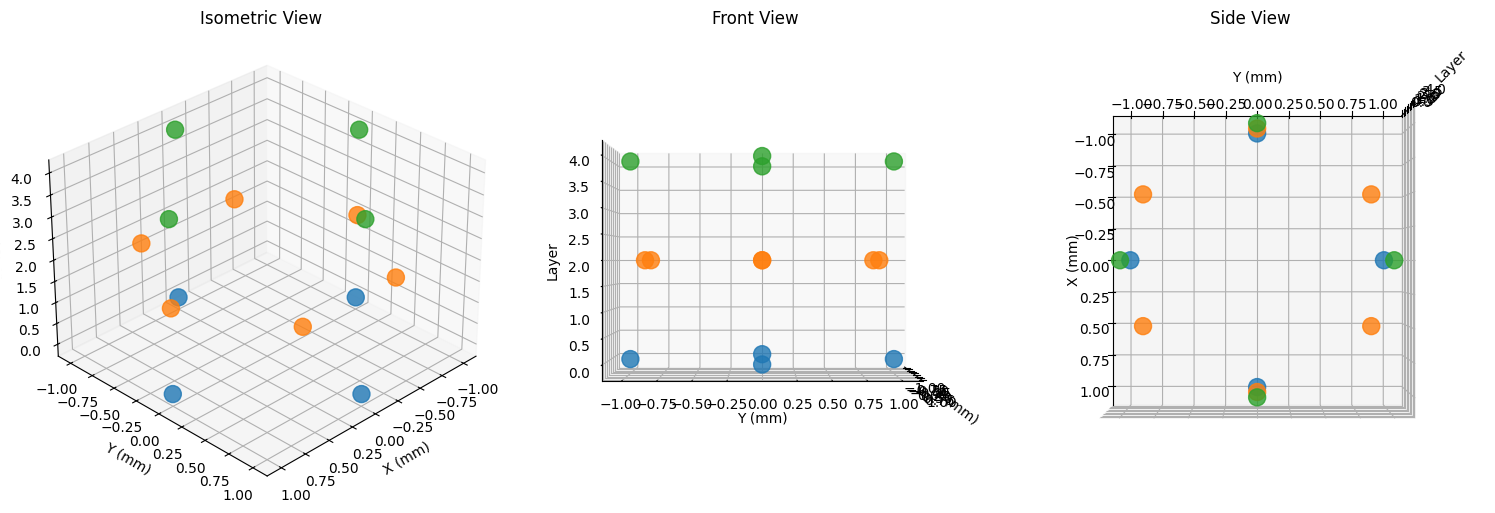


Optimal viewing angles provide different insights:
- Isometric: Overall 3D structure
- Front: Layer-to-layer connectivity
- Side: Depth relationships


In [11]:
# Best practices demonstration
print("3D Visualization Best Practices:")
print("================================")
print()
print("1. Viewing Angles:")
print("   - Azimuth: 0-360° horizontal rotation")
print("   - Elevation: -90 to 90° vertical angle")
print("   - Choose angles that minimize occlusion")
print()
print("2. Color Usage:")
print("   - Hot: High activity/intensity")
print("   - Cool: Low activity/intensity")
print("   - Diverging: Positive/negative values")
print("   - Sequential: Temporal progression")
print()
print("3. Transparency:")
print("   - Use alpha < 1 for overlapping structures")
print("   - Layer multiple transparent surfaces")
print("   - Adjust based on data density")
print()
print("4. Scale and Proportion:")
print("   - Maintain aspect ratios")
print("   - Use consistent units")
print("   - Add scale references")
print()
print("5. Interactivity:")
print("   - Enable rotation for exploration")
print("   - Provide multiple viewpoints")
print("   - Consider animation for dynamics")

# Example: Optimized visualization with best practices
fig = plt.figure(figsize=(15, 5))

# Show same data from three optimal viewing angles
angles = [(30, 45), (0, 0), (90, 0)]
titles = ['Isometric View', 'Front View', 'Side View']

for i, ((elev, azim), title) in enumerate(zip(angles, titles)):
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')

    # Create sample network
    layers = [4, 6, 4]
    neural_network_3d(layers, ax=ax, title=title,
                      layer_spacing=2.0, node_size=150)

    # Set viewing angle
    ax.view_init(elev=elev, azim=azim)

    # Add grid for reference
    ax.grid(True, alpha=0.3)

    # Add labels with units
    ax.set_xlabel('X (mm)')
    ax.set_ylabel('Y (mm)')
    ax.set_zlabel('Layer')

plt.tight_layout()
plt.show()

print("\nOptimal viewing angles provide different insights:")
print("- Isometric: Overall 3D structure")
print("- Front: Layer-to-layer connectivity")
print("- Side: Depth relationships")

## Summary and Conclusions

This comprehensive tutorial has demonstrated the power of 3D visualization for neural data analysis using BrainTools. We've covered:

1. **Neural Network Architecture** - Visualizing deep learning and biological networks
2. **Brain Surface Mapping** - Displaying activation patterns on anatomical structures
3. **Connectivity Networks** - Understanding communication between brain regions
4. **Neural Trajectories** - Tracking dynamics in state space
5. **Volume Rendering** - Visualizing 3D imaging and activity data
6. **Electrode Arrays** - Spatial organization of recording sites
7. **Dendritic Morphology** - Neuronal structure visualization
8. **Phase Space Analysis** - Dynamical systems and attractors

Applications:
- **Neuroscience Research**: Understanding brain structure and function
- **Clinical Applications**: Surgical planning and diagnostics
- **Machine Learning**: Neural network architecture design
- **Data Analysis**: Multi-dimensional pattern recognition
